# Precision-Recall Curve

- Axis Y (Precision):

$$\text{Precision} = \frac{TP}{TP+FP}$$

- Axis X (Recall):

$$\text{Recall} = \frac{TP}{TP+FN}$$

- The PR curve is a better metric than ROC when we have an imbalanced dataset, i. e., when the minority class (class 1) is much more important than the big samples of the class majority (class 0)

- The best point of the graph is (1, 1), i.e, precision equals 1 and recall equals zero. This situation means false positive and false negative equals zero (Area under curve equals 1)

- The baseline for PR curve is equals $\frac{P}{P + N}$, i. e., if we just say all the classes are positive ($FN = 0$).

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import metrics
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

%matplotlib inline

In [2]:
X, y = make_blobs(n_samples=1500, centers=2, n_features=2, random_state=123, cluster_std=5.0)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((1200, 2), (1200,), (300, 2), (300,))

# negatives = 154
# positives = 146


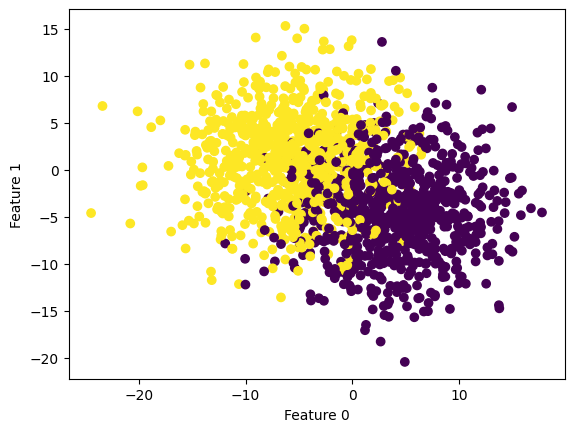

In [3]:
print(f"# negatives = {(y_test == 0).sum()}")
print(f"# positives = {(y_test == 1).sum()}")
plt.scatter(X[:, 0], X[:, 1], c=y)
plt.xlabel('Feature 0')
plt.ylabel('Feature 1')
plt.show()

# Regression Model

In [4]:
model_regression = LogisticRegression().fit(X_train, y_train)
model_regression

LogisticRegression()

In [5]:
preds_regression = model_regression.predict_proba(X_test) # taking only the positives cases

In [6]:
precision, recall, thresholds = metrics.precision_recall_curve(y_test, preds_regression[:,1])

baseline: 0.4866666666666667


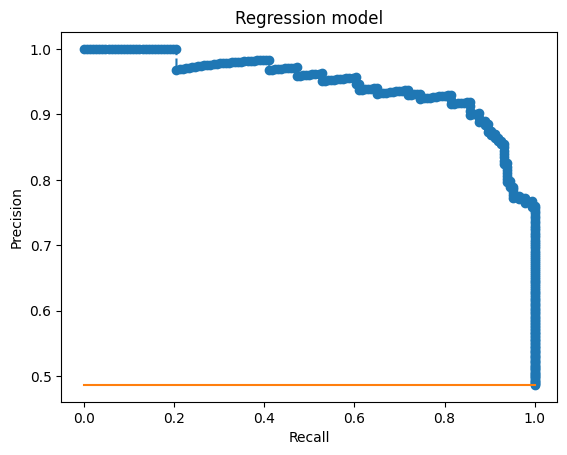

In [7]:
plt.scatter(recall, precision)
plt.plot(recall, precision, linestyle="--")
baseline = len(y_test[y_test==1])/len(y_test)
print(f"baseline: {baseline}")
plt.plot([0, 1], [baseline, baseline])
plt.title("Regression model")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.show()

In [8]:
print(f"F1 Score Regression Model: {metrics.f1_score(y_test, model_regression.predict(X_test)):.4f}")
print(f"Regression Model (AUC): {metrics.auc(recall, precision):.4f}")

F1 Score Regression Model: 0.8851
Regression Model (AUC): 0.9461


# Tree Decision

In [9]:
model_tree = DecisionTreeClassifier().fit(X_train, y_train)
model_tree

DecisionTreeClassifier()

In [10]:
preds_tree = model_tree.predict_proba(X_test)[:,1]  # again, taking only the positives cases

In [11]:
precision, recall, thresholds = metrics.precision_recall_curve(y_test, preds_tree)

baseline: 0.4866666666666667


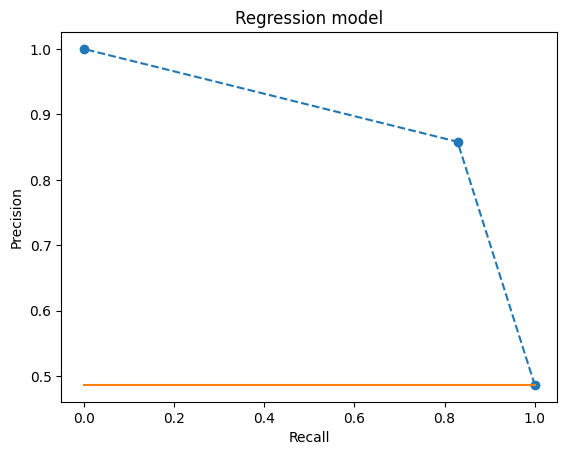

In [12]:
plt.scatter(recall, precision)
plt.plot(recall, precision, linestyle="--")
baseline = len(y_test[y_test==1])/len(y_test)
print(f"baseline: {baseline}")
plt.plot([0, 1], [baseline, baseline])
plt.title("Regression model")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.show()

In [13]:
print(f"F1 Score Tree Model: {metrics.f1_score(y_test, model_tree.predict(X_test)):.4f}")
print(f"Tree Model (AUC): {metrics.auc(recall, precision):.4f}")

F1 Score Tree Model: 0.8432
Tree Model (AUC): 0.8851


As we can see the f1-score and AUC of the regression model is higher than decision tree, i.e, it's the best model for the problem

# Multi-Class Problem

In [28]:
N_CLASSES = 10

# class 0 = 400
# class 1 = 400
# class 2 = 400
# class 3 = 400
# class 4 = 400
# class 5 = 400
# class 6 = 400
# class 7 = 400
# class 8 = 400
# class 9 = 400


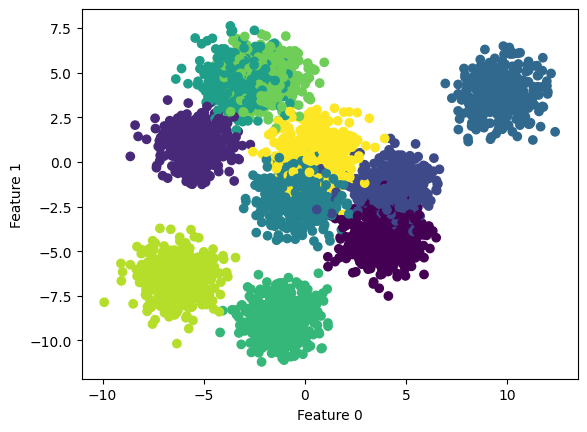

In [29]:
X, y = make_blobs(n_samples=4000, centers=N_CLASSES, n_features=2, random_state=123, cluster_std=1.0)

for c in np.unique(y):
    print(f"# class {c} = {(y == c).sum()}")
plt.scatter(X[:, 0], X[:, 1], c=y)
plt.xlabel('Feature 0')
plt.ylabel('Feature 1')
plt.show()

In [30]:
from sklearn.preprocessing import label_binarize
y = label_binarize(y, classes=[*range(N_CLASSES)])

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((3200, 2), (3200, 10), (800, 2), (800, 10))

In [32]:
y_test

array([[0, 0, 0, ..., 0, 1, 0],
       [1, 0, 0, ..., 0, 0, 0],
       [0, 1, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 1, 0, 0]])

# Creating Neural Network

In [33]:
import tensorflow as tf
from keras.layers import Dense, Input
from keras.optimizers import SGD
from keras.models import Sequential
from keras.losses import CategoricalCrossentropy

In [34]:
model = Sequential(
    [
        Input(shape=(2, ), name="INPUT SHAPE"),
        Dense(units=32, activation="relu"),
        Dense(units=10, activation="softmax")
    ]
)

In [35]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 32)                96        
                                                                 
 dense_3 (Dense)             (None, 10)                330       
                                                                 
Total params: 426
Trainable params: 426
Non-trainable params: 0
_________________________________________________________________


In [36]:
optim = SGD()
loss = CategoricalCrossentropy(from_logits=False)
model.compile(optimizer="SGD", loss=loss, metrics=["accuracy"])

In [37]:
model.fit(X_train, y_train, batch_size=16, epochs=10, validation_split=0.2)

Epoch 1/10
160/160 [==============================] - 0s 1ms/step - loss: 1.4490 - accuracy: 0.5020 - val_loss: 0.9738 - val_accuracy: 0.6344
Epoch 2/10
160/160 [==============================] - 0s 809us/step - loss: 0.8580 - accuracy: 0.7043 - val_loss: 0.7681 - val_accuracy: 0.7266
Epoch 3/10
160/160 [==============================] - 0s 863us/step - loss: 0.7128 - accuracy: 0.7531 - val_loss: 0.6640 - val_accuracy: 0.7594
Epoch 4/10
160/160 [==============================] - 0s 804us/step - loss: 0.6305 - accuracy: 0.7855 - val_loss: 0.5953 - val_accuracy: 0.7875
Epoch 5/10
160/160 [==============================] - 0s 792us/step - loss: 0.5737 - accuracy: 0.8168 - val_loss: 0.5444 - val_accuracy: 0.8109
Epoch 6/10
160/160 [==============================] - 0s 810us/step - loss: 0.5309 - accuracy: 0.8266 - val_loss: 0.5094 - val_accuracy: 0.8281
Epoch 7/10
160/160 [==============================] - 0s 782us/step - loss: 0.4984 - accuracy: 0.8355 - val_loss: 0.4769 - val_accuracy: 0

In [38]:
preds = model.predict(X_test)

25/25 [==============================] - 0s 542us/step


In [39]:
cm = metrics.confusion_matrix(np.argmax(y_test, axis=1), np.argmax(preds, axis=1))
# Axis horizontal = Predicted Values
# Axis vertical = Actual Values
cm

array([[64,  0,  3,  0,  0,  0,  1,  0,  0,  0],
       [ 0, 70,  0,  0,  0,  2,  0,  0,  0,  0],
       [ 8,  0, 68,  0,  0,  0,  0,  0,  0,  1],
       [ 0,  0,  0, 78,  0,  0,  0,  0,  0,  0],
       [ 6,  0,  3,  0, 67,  0,  2,  0,  7,  5],
       [ 0,  0,  0,  0,  0, 61,  0, 28,  0,  0],
       [ 0,  0,  0,  0,  0,  0, 84,  0,  0,  0],
       [ 0,  0,  0,  0,  0, 30,  0, 54,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  1,  0, 84,  0],
       [ 1,  2,  5,  0,  9,  0,  0,  3,  0, 53]])

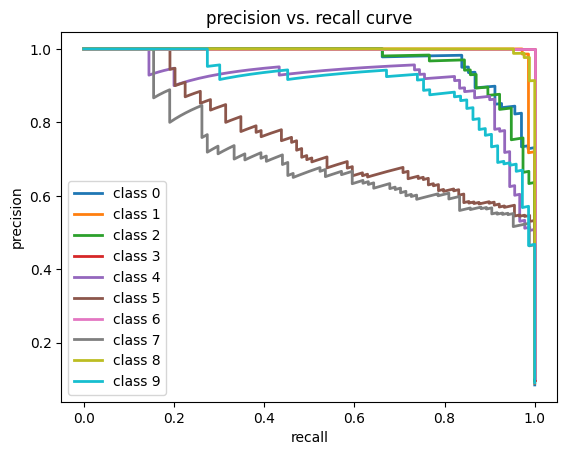

In [40]:
precisions = dict()
recalls = dict()
aucs = dict()
for i in range(N_CLASSES):
    precisions[i], recalls[i], _ = metrics.precision_recall_curve(y_test[:,i], preds[:,i])
    aucs[i] = metrics.auc(recalls[i], precisions[i])
    plt.plot(recalls[i], precisions[i], lw=2, label='class {}'.format(i))
plt.xlabel("recall")
plt.ylabel("precision")
plt.legend(loc="best")
plt.title("precision vs. recall curve")
plt.show()

In [41]:
aucs

{0: 0.973034484632562,
 1: 0.9958972105641708,
 2: 0.96838710657067,
 3: 1.0,
 4: 0.9142358056443095,
 5: 0.7563993307264733,
 6: 1.0,
 7: 0.7126093487472731,
 8: 0.9984237675162835,
 9: 0.910138027091441}